In [5]:
import pandas as pd

from pathlib import Path


In [6]:
# load data
file_path = Path("intermediate_tables") / "parquet_files" / "processed_weather_and_crop_data.parquet"
file_path = file_path.resolve()

df_centralised = pd.read_parquet(file_path, engine='pyarrow')

import category_encoders as ce
# Create a target encoder
target_encoder = ce.TargetEncoder(cols=['CultivarID'])

# Fit and transform the 'CultivarID' column using the target encoder
df_centralised['CultivarID_encoded'] = target_encoder.fit_transform(df_centralised['CultivarID'], df_centralised['GrainYield_gm2'])

df_centralised.head()

df_centralised.columns

Index(['Year', 'Name', 'State', 'RegionName', 'SiteDescription', 'TrialCode',
       'SowingDate', 'HarvestDate', 'Abandoned', 'CultivarID',
       'GrainYield_gm2', 'T.Max_avg', 'T.Min_avg', 'Rain_avg', 'Evap_avg',
       'Radn_avg', 'VP_avg', 'RHmaxT_avg', 'RHminT_avg', 'CultivarID_encoded'],
      dtype='object')

In [7]:
X_cols = ['Year', 'T.Max_avg', 'T.Min_avg', 'Rain_avg', 'Evap_avg',
       'Radn_avg', 'VP_avg', 'RHmaxT_avg', 'RHminT_avg', 'CultivarID_encoded']

X = df_centralised[X_cols]
y = df_centralised['GrainYield_gm2']

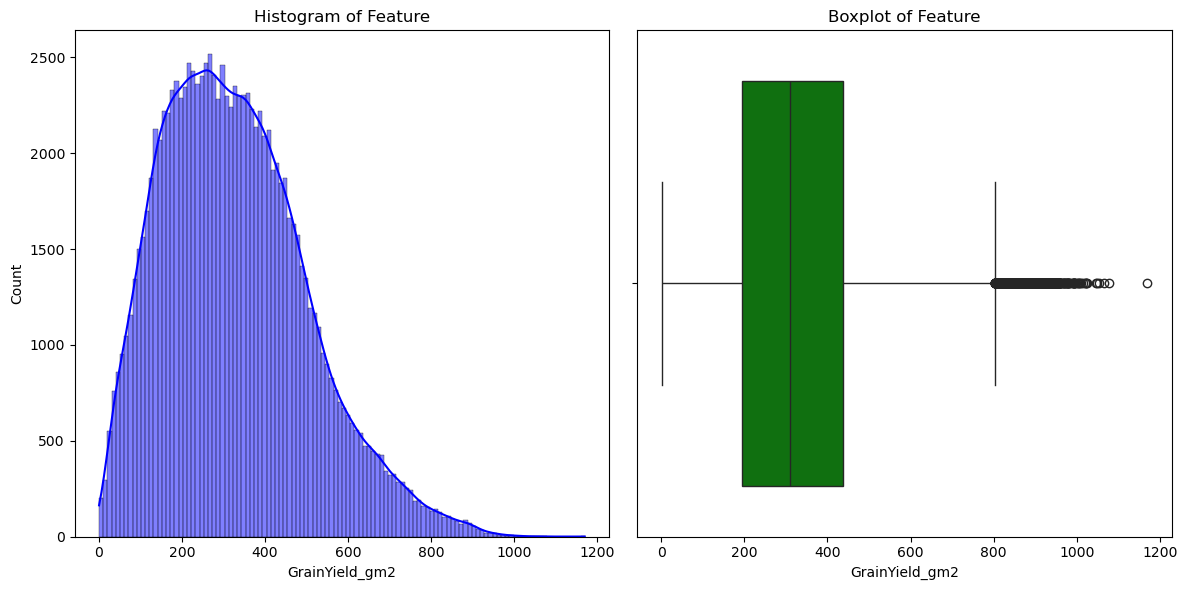

Skewness of the feature: 0.6029743429296124


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from scipy.stats import skew

# Load the Iris dataset


# Choose a feature to analyze (e.g., sepal length)
feature = df_centralised['GrainYield_gm2']

# Plot histogram and boxplot to visualize skewness
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(feature, kde=True, color='blue')
plt.title('Histogram of Feature')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=feature, color='green')
plt.title('Boxplot of Feature')

plt.tight_layout()
plt.show()

# Calculate skewness of the feature
feature_skewness = skew(feature)
print(f'Skewness of the feature: {feature_skewness}')


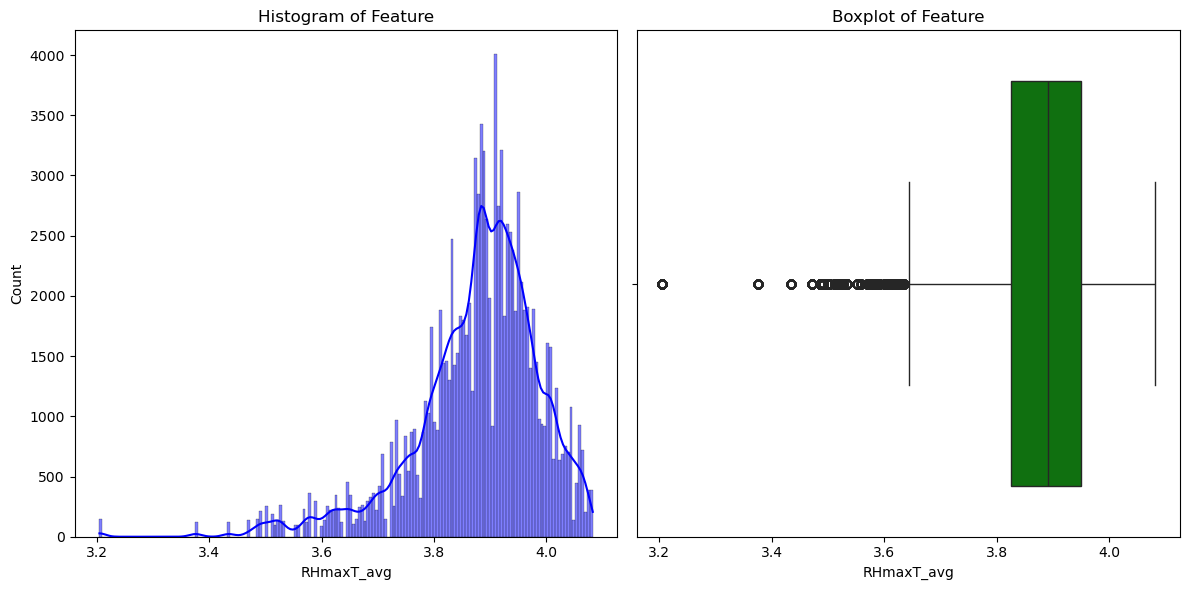

Skewness of the feature: -1.2643324029864227


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from scipy.stats import skew

# Load the Iris dataset


# Choose a feature to analyze (e.g., sepal length)
feature = df_centralised['RHmaxT_avg']
transformed = np.log1p(feature + 1)  # Apply log transformation

# Plot histogram and boxplot to visualize skewness
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(transformed, kde=True, color='blue')
plt.title('Histogram of Feature')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=transformed, color='green')
plt.title('Boxplot of Feature')

plt.tight_layout()
plt.show()

# Calculate skewness of the feature
feature_skewness = skew(transformed)
print(f'Skewness of the feature: {feature_skewness}')


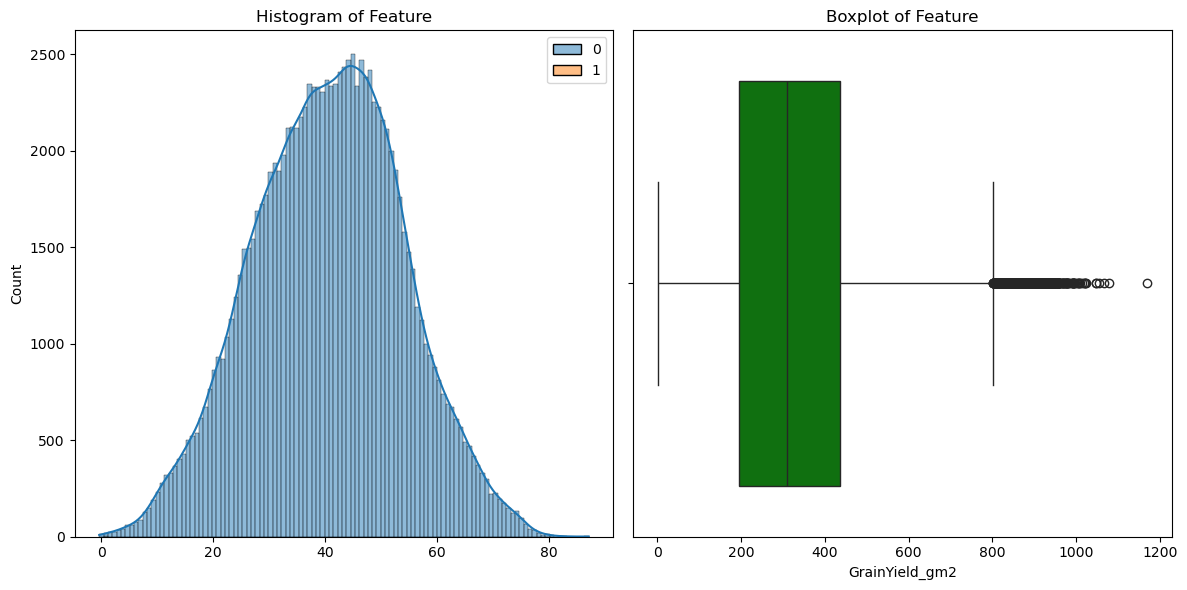

Skewness of the feature: 0.6029743429296124


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from scipy.stats import skew
from scipy.stats import boxcox

# Load the Iris dataset


# Choose a feature to analyze (e.g., sepal length)
feature = df_centralised['GrainYield_gm2']
X_skewed = boxcox(feature)
# Plot histogram and boxplot to visualize skewness
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(X_skewed, kde=True, color='blue')
plt.title('Histogram of Feature')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=y, color='green')
plt.title('Boxplot of Feature')

plt.tight_layout()
plt.show()

# Calculate skewness of the feature
feature_skewness = skew(feature)
print(f'Skewness of the feature: {feature_skewness}')


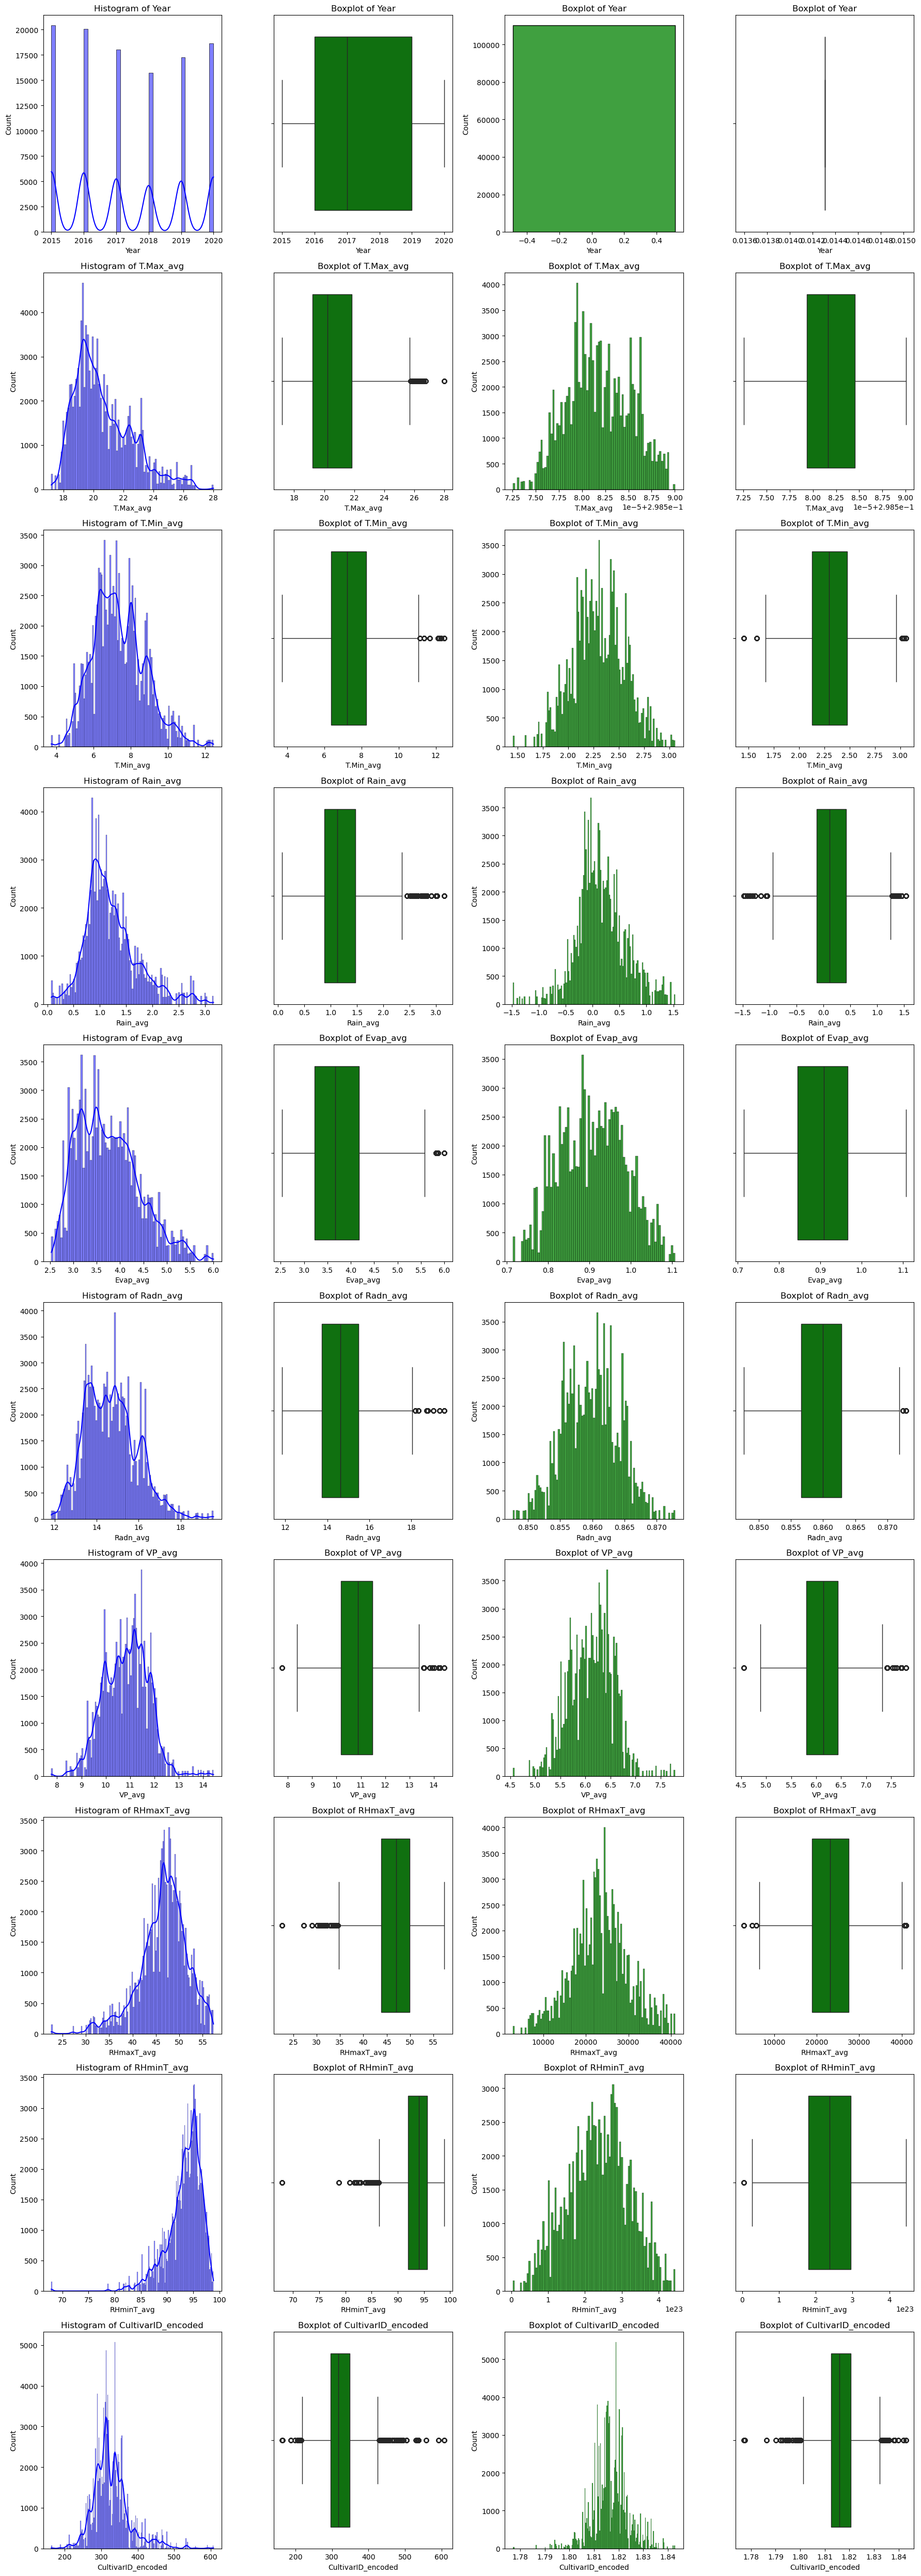

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Load your data (replace with your actual DataFrame)
# Assuming df contains the features in X_cols
df = df_centralised.copy()

# Define the features to plot
X_cols_to_normalise = ['T.Max_avg', 'T.Min_avg', 'Rain_avg', 'Evap_avg',
          'Radn_avg', 'VP_avg', 'RHmaxT_avg', 'RHminT_avg', 'CultivarID_encoded']


lambda_values = {}


df_transformed = df[X_cols].copy()
# Apply log transformation to the features
for col in X_cols:
    df_transformed[col], lamb = boxcox(df[col])  # Extract only the transformed data
    lambda_values[col] = lamb  # Store the lambda value for each feature

#df[X_cols] = x_transformed[X_cols]

# Set up the plotting grid: 10 features, each with a histogram and boxplot
n_features = len(X_cols)
fig, axes = plt.subplots(nrows=n_features, ncols=4, figsize=(18, 5 * n_features))

# Plot histogram and boxplot for each feature
for i, col in enumerate(X_cols):
    # Histogram with KDE
    sns.histplot(df[col], kde=True, ax=axes[i, 0], color='blue')
    axes[i, 0].set_title(f'Histogram of {col}')
    
    # Boxplot
    sns.boxplot(x=df[col], ax=axes[i, 1], color='green')
    axes[i, 1].set_title(f'Boxplot of {col}')

    # Boxplot
    sns.histplot(x=df_transformed[col], ax=axes[i, 2], color='green')
    axes[i, 2].set_title(f'Boxplot of {col}')

    # Boxplot
    sns.boxplot(x=df_transformed[col], ax=axes[i, 3], color='green')
    axes[i, 3].set_title(f'Boxplot of {col}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[X_cols])
# numpy array to pandas DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X_cols)
X_scaled.drop(columns=['CultivarID_encoded', 'Radn_avg'], inplace=True)



In [13]:
from sklearn.decomposition import PCA

# After fitting PCA
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)

# See how much variance each component explains
print(pca.explained_variance_ratio_)
print("Cumulative variance:", pca.explained_variance_ratio_.cumsum())

[0.50519543 0.30439718 0.09171534 0.04811876 0.04068889 0.00650611
 0.0033783  0.        ]
Cumulative variance: [0.50519543 0.80959261 0.90130794 0.9494267  0.99011559 0.9966217
 1.         1.        ]


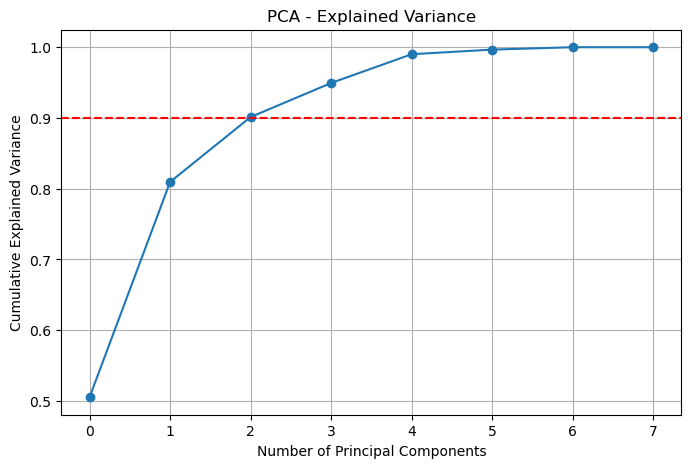

In [14]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--')  # 90% threshold
plt.show()

In [15]:
# Split y into 3 quantile-based groups

y_binned = pd.qcut(y, q=3, labels=['Low Yield', 'Medium Yield', 'High Yield'])


In [16]:
from sklearn.decomposition import PCA

# 3. PCA (reduce to 2D for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Category'] = y_binned

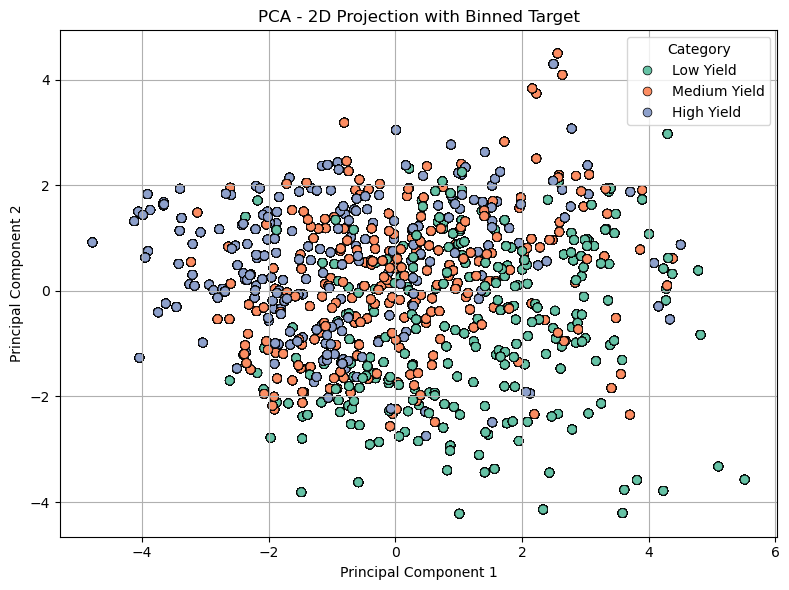

In [17]:
# 5. Plot the PCA result with clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Category', palette='Set2', s=40, edgecolor='k')
plt.title('PCA - 2D Projection with Binned Target')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
from sklearn.decomposition import PCA

# 3. PCA (reduce to 2D for visualization)
pca3d = PCA(n_components=3)
X_pca3d = pca3d.fit_transform(X_scaled)
pca3d_df = pd.DataFrame(X_pca3d, columns=['PC1', 'PC2', 'PC3'])
pca3d_df['Category'] = y_binned

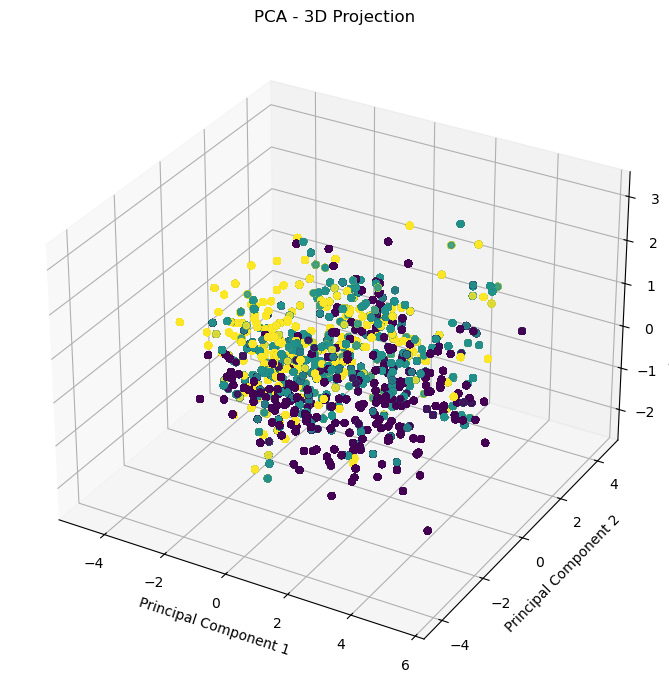

In [19]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Assuming you've already done:
# pca = PCA(n_components=3)
# X_pca = pca.fit_transform(X_scaled)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot of the PCA components
ax.scatter(pca3d_df['PC1'], pca3d_df['PC2'], pca3d_df['PC3'], s=20, c=pca3d_df['Category'].astype('category').cat.codes, cmap='viridis', alpha=0.8)

ax.set_title('PCA - 3D Projection')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.tight_layout()
plt.show()

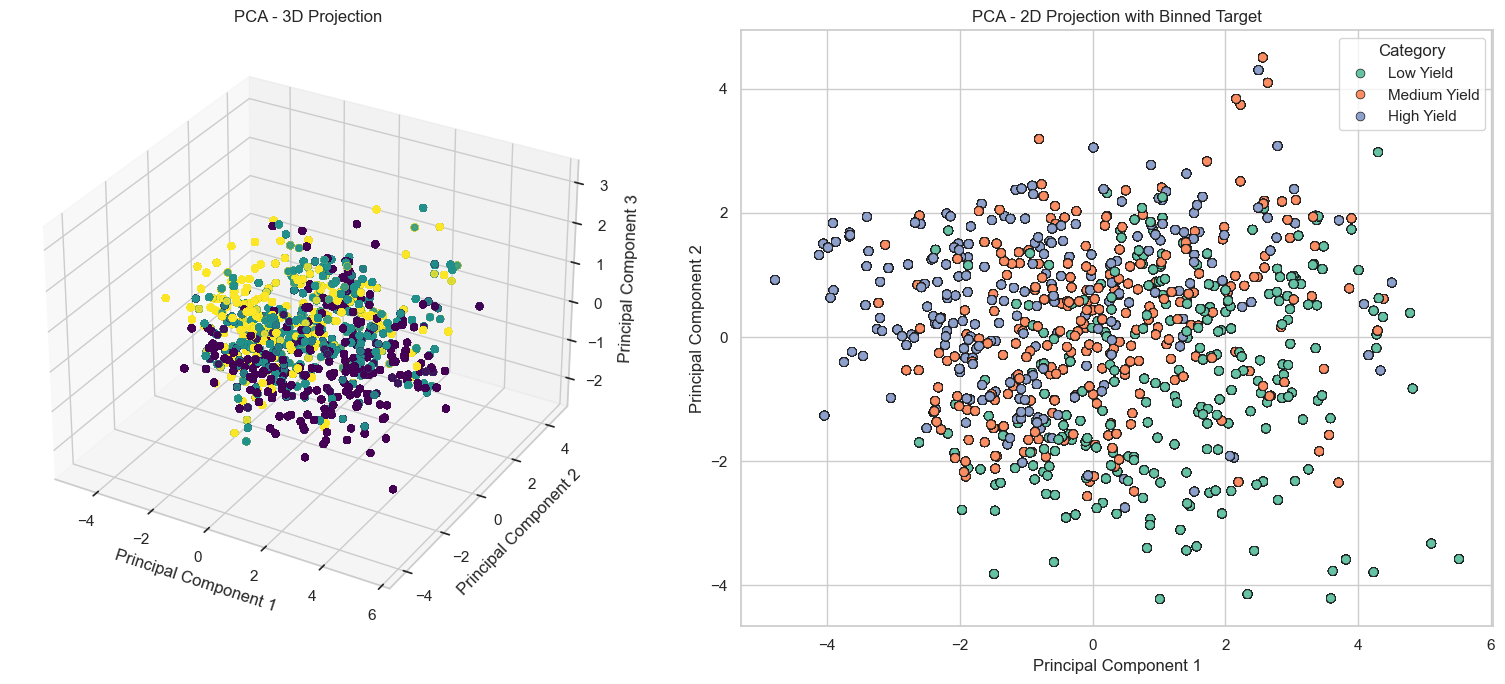

: 

: 

: 

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 1 row and 2 columns for the subplots
fig = plt.figure(figsize=(16, 7))

# ---- 3D PCA subplot ----
ax1 = fig.add_subplot(121, projection='3d')

# 3D scatter plot of the PCA components
ax1.scatter(pca3d_df['PC1'], pca3d_df['PC2'], pca3d_df['PC3'], 
            s=20, c=pca_df['Category'].astype('category').cat.codes, 
            cmap='viridis', alpha=0.8)

ax1.set_title('PCA - 3D Projection')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_zlabel('Principal Component 3')

# ---- 2D PCA subplot ----
ax2 = fig.add_subplot(122)

# 2D scatter plot with binned target variable
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Category', 
                palette='Set2', s=40, edgecolor='k', ax=ax2)
ax2.set_title('PCA - 2D Projection with Binned Target')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.grid(True)

# Tight layout to make sure everything fits
plt.tight_layout()
plt.show()


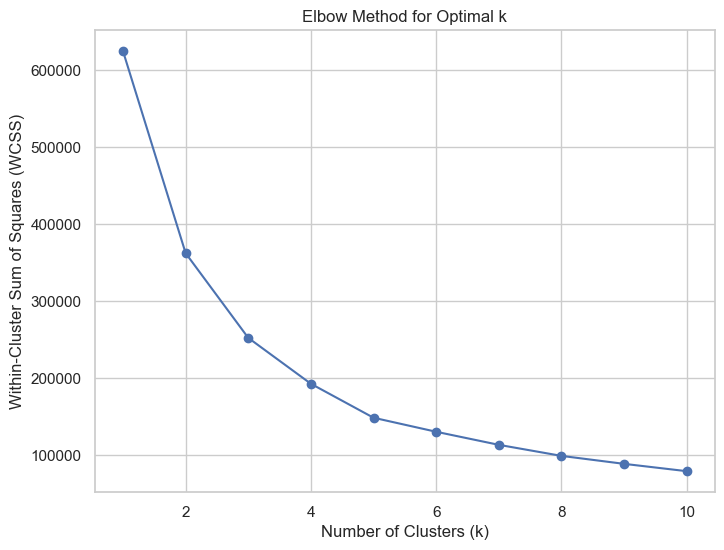

: 

: 

: 

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Compute WCSS for different k values
wcss = []
k_range = range(1, 11)  # Test k from 1 to 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pca_df[['PC1', 'PC2']])
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

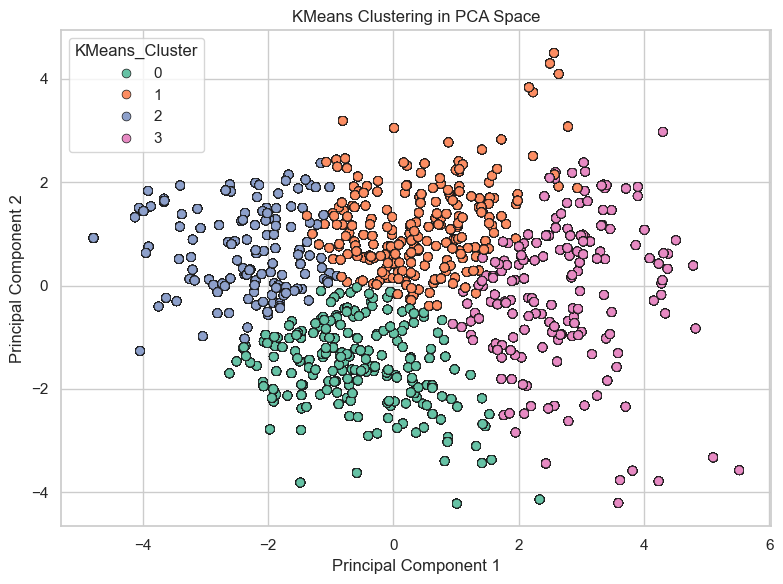

: 

: 

: 

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to DataFrame
df['KMeans_Cluster'] = kmeans_clusters

# Plot the clusters in 2D PCA space
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue=df['KMeans_Cluster'], 
                palette='Set2', s=40, edgecolor='k')
plt.title('KMeans Clustering in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.mixture import GaussianMixture
import seaborn as sns

# Assuming pca_df is your DataFrame with 'PC1', 'PC2', 'PC3' columns from PCA
# And optionally 'Category' column from binned target

# Run GMM
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
pca3d_df['GMM_Cluster'] = gmm.fit_predict(pca3d_df[['PC1', 'PC2', 'PC3']])

gmm2 = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
pca_df['GMM_Cluster'] = gmm.fit_predict(pca3d_df[['PC1', 'PC2']])

: 

: 

: 

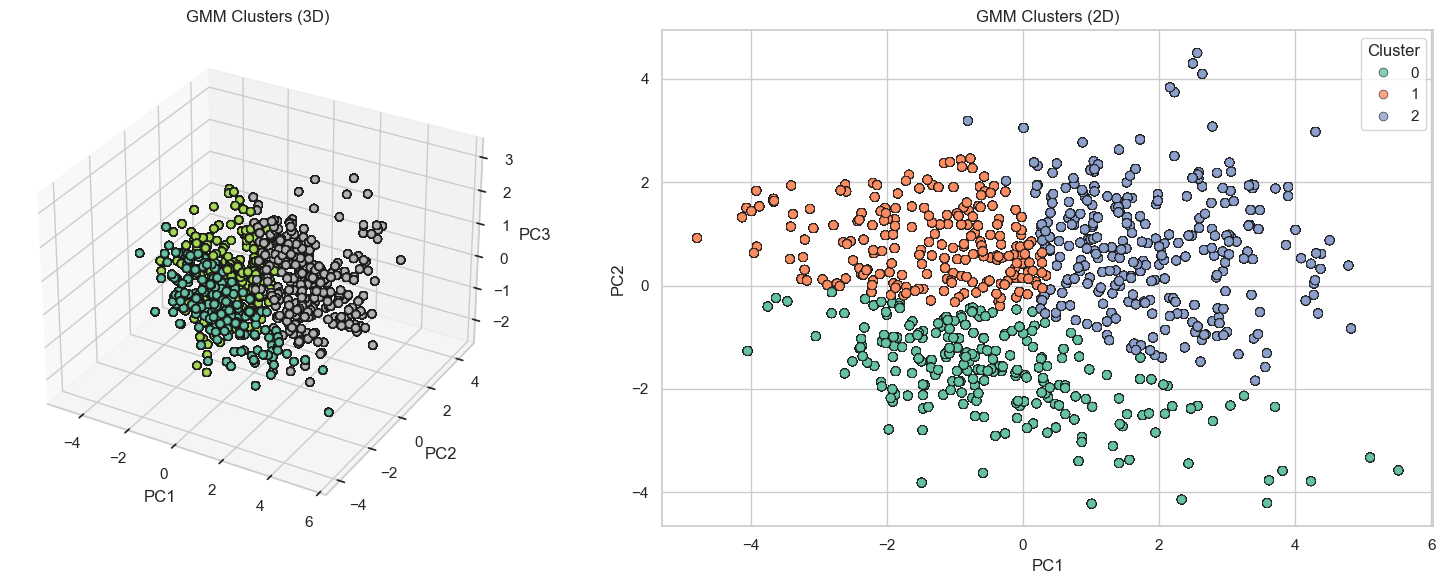

: 

: 

: 

In [ ]:


# --- Plotting ---
sns.set(style="whitegrid")
fig = plt.figure(figsize=(16, 6))

# 3D Plot
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
scatter = ax1.scatter(
    pca3d_df['PC1'], pca3d_df['PC2'], pca3d_df['PC3'],
    c=pca3d_df['GMM_Cluster'], cmap='Set2', s=30, edgecolor='k', alpha=0.8
)
ax1.set_title('GMM Clusters (3D)')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')

# 2D Plot
ax2 = fig.add_subplot(1, 2, 2)
sns.scatterplot(
    data=pca_df,
    x='PC1', y='PC2',
    hue='GMM_Cluster',
    palette='Set2',
    s=40, edgecolor='k', alpha=0.8,
    ax=ax2
)
ax2.set_title('GMM Clusters (2D)')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.legend(title='Cluster')

plt.tight_layout()
plt.show()

plt.show()


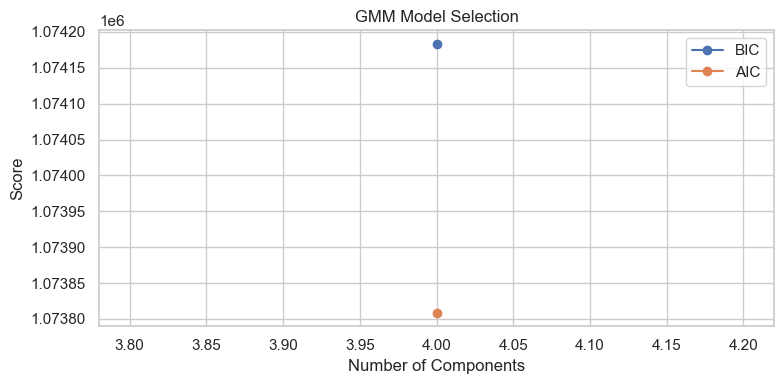

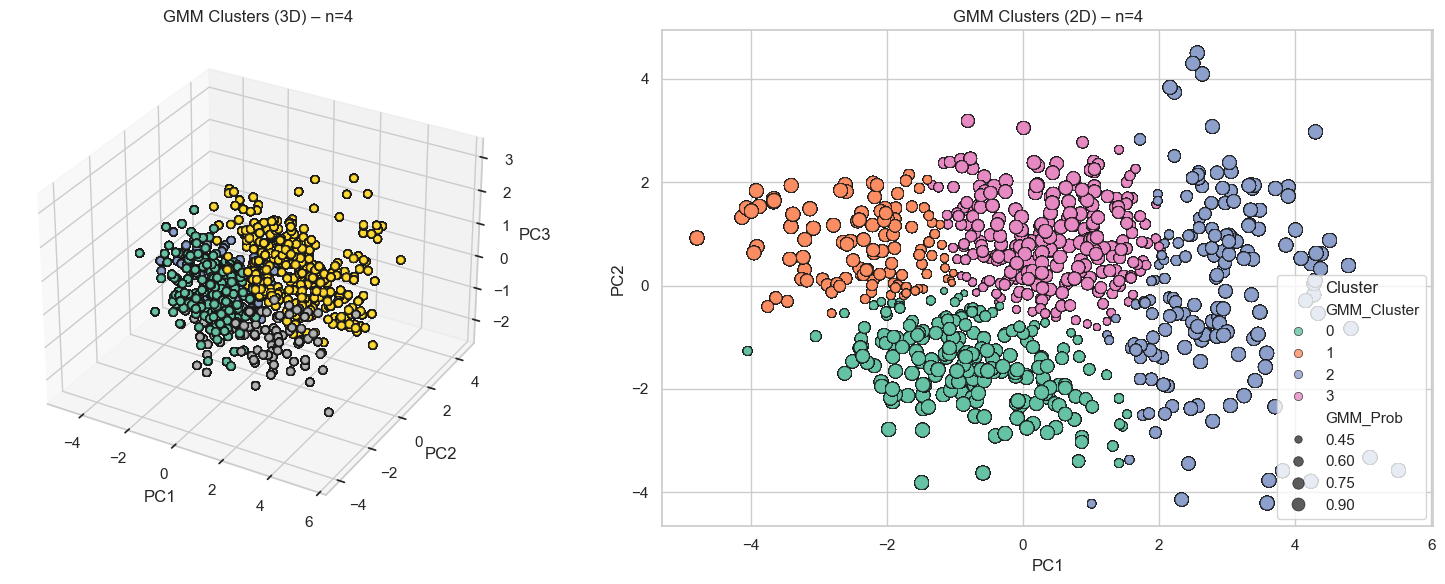

: 

: 

: 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D

# ========== Model Selection using BIC & AIC ==========
bic_scores = []
aic_scores = []
n_components_range = [4]

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=42)
    gmm.fit(pca3d_df[['PC1', 'PC2', 'PC3']])
    bic_scores.append(gmm.bic(pca3d_df[['PC1', 'PC2', 'PC3']]))
    aic_scores.append(gmm.aic(pca3d_df[['PC1', 'PC2', 'PC3']]))

# Plot BIC and AIC scores
plt.figure(figsize=(8, 4))
plt.plot(n_components_range, bic_scores, label='BIC', marker='o')
plt.plot(n_components_range, aic_scores, label='AIC', marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.title('GMM Model Selection')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ========== Fit GMM with Best n_components ==========
best_n = n_components_range[np.argmin(bic_scores)]
gmm = GaussianMixture(n_components=best_n, covariance_type='full', random_state=42)
pca3d_df['GMM_Cluster'] = gmm.fit_predict(pca3d_df[['PC1', 'PC2', 'PC3']])
pca3d_df['GMM_Prob'] = gmm.predict_proba(pca3d_df[['PC1', 'PC2', 'PC3']]).max(axis=1)  # Confidence of assigned cluster

best_n = n_components_range[np.argmin(bic_scores)]
gmm = GaussianMixture(n_components=best_n, covariance_type='full', random_state=42)
pca_df['GMM_Cluster'] = gmm.fit_predict(pca_df[['PC1', 'PC2']])
pca_df['GMM_Prob'] = gmm.predict_proba(pca_df[['PC1', 'PC2']]).max(axis=1)  # Confidence of assigned cluster

# ========== Plot GMM Clustering Results with Alpha ==========

fig = plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")

# --- 3D Scatter with Alpha for Cluster Confidence ---
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
sc1 = ax1.scatter(
    pca3d_df['PC1'], pca3d_df['PC2'], pca3d_df['PC3'],
    c=pca3d_df['GMM_Cluster'],
    cmap='Set2',
    s=30,
    edgecolor='k',
    alpha=pca3d_df['GMM_Prob']  # Transparency = confidence
)
ax1.set_title(f'GMM Clusters (3D) – n={best_n}')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')

# --- 2D Scatter with Alpha ---
ax2 = fig.add_subplot(1, 2, 2)
sns.scatterplot(
    data=pca_df,
    x='PC1', y='PC2',
    hue='GMM_Cluster',
    palette='Set2',
    size=pca_df['GMM_Prob'],
    sizes=(20, 100),
    alpha=0.8,
    edgecolor='k',
    ax=ax2
)
ax2.set_title(f'GMM Clusters (2D) – n={best_n}')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.legend(title='Cluster')

plt.tight_layout()
plt.show()


Index(['PC1', 'PC2', 'Category', 'GMM_Cluster', 'GMM_Prob'], dtype='object')


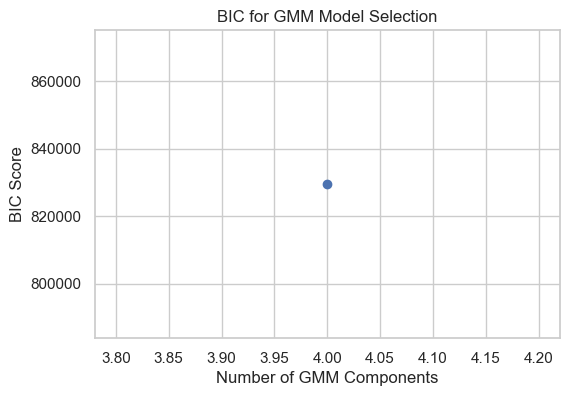

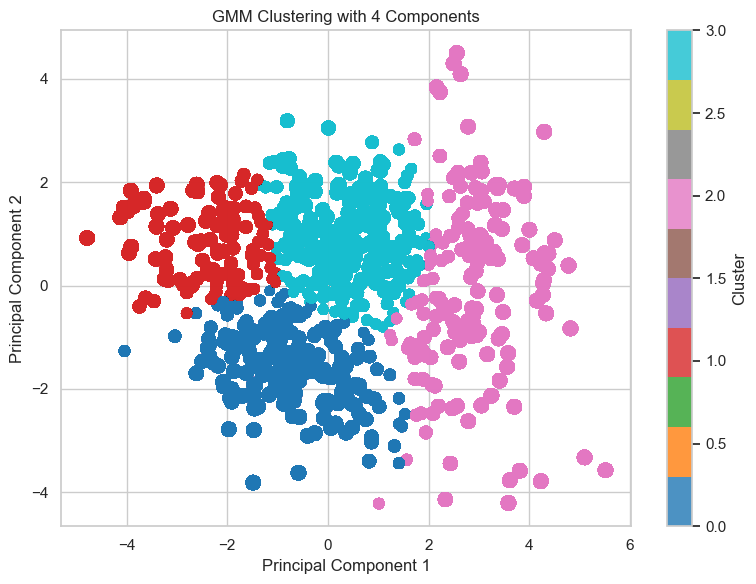

: 

: 

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Assuming you have your raw data and target (for color reference later)
# X = raw feature matrix (before PCA)
# y = true labels (e.g., Low/Medium/High or numerical)
# If you're starting from PCA-reduced data, skip to "gmm.fit(X_pca)"

# Step 1: Standardize and reduce to 2D PCA

# Step 2: Fit GMM with different numbers of components and evaluate BIC
print(pca_df.columns)
bics = []
models = []
component_range = [4]  # Adjust as needed

for k in component_range:
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
    gmm.fit(pca_df[['PC1', 'PC2']])
    bics.append(gmm.bic(pca_df[['PC1', 'PC2']]))
    models.append(gmm)

# Step 3: Plot BIC to choose best model
plt.figure(figsize=(6, 4))
plt.plot(component_range, bics, marker='o')
plt.xlabel('Number of GMM Components')
plt.ylabel('BIC Score')
plt.title('BIC for GMM Model Selection')
plt.show()

# Step 4: Use best model to predict
best_k = component_range[np.argmin(bics)]
best_gmm = models[np.argmin(bics)]
cluster_labels = best_gmm.predict(pca_df[['PC1', 'PC2']])
probs = best_gmm.predict_proba(pca_df[['PC1', 'PC2']])  # for soft assignments
dot_sizes = 100 * probs.max(axis=1)  # Scale dot sizes by max probability

# Step 5: Visualize clustering result
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=cluster_labels, cmap='tab10', s=dot_sizes, alpha=0.8)
plt.title(f'GMM Clustering with {best_k} Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()



def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse representing a Gaussian component"""
    ax = ax or plt.gca()
    
    if covariance.shape == (2, 2):  # Full covariance
        U, s, _ = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    elif covariance.ndim == 1 and len(covariance) == 2:  # Diagonal
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    else:
        raise ValueError("Covariance must be 2D shape (2,2) or 1D shape (2,)")

    ellipse = Ellipse(xy=position, width=width, height=height, angle=angle, **kwargs)
    ax.add_patch(ellipse)



## DBScan

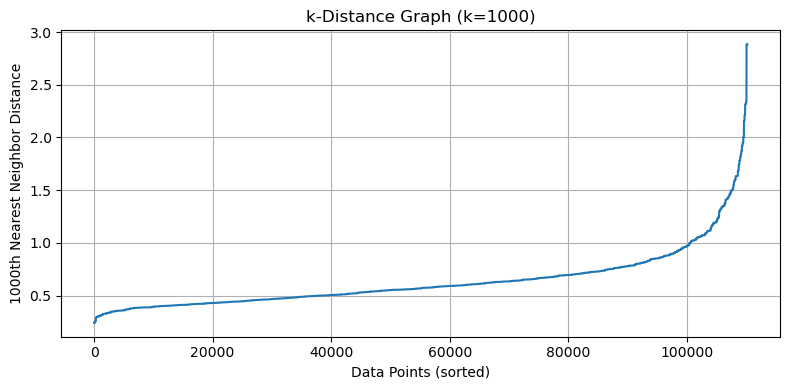

: 

: 

: 

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# X = pca_df[['PC1', 'PC2', 'PC3']]  # or the scaled version
# X_scaled = StandardScaler().fit_transform(X)
X = pca3d_df[['PC1', 'PC2', 'PC3']]
# Use k = min_samples
k = 1000
nn = NearestNeighbors(n_neighbors=k)
nn.fit(X)
distances, _ = nn.kneighbors(X)

# Take the k-th nearest distance for each point
k_distances = np.sort(distances[:, k-1])

# Plot the k-distance graph
plt.figure(figsize=(8, 4))
plt.plot(k_distances)
plt.title(f'k-Distance Graph (k={k})')
plt.xlabel('Data Points (sorted)')
plt.ylabel(f'{k}th Nearest Neighbor Distance')
plt.grid(True)
plt.tight_layout()
plt.show()


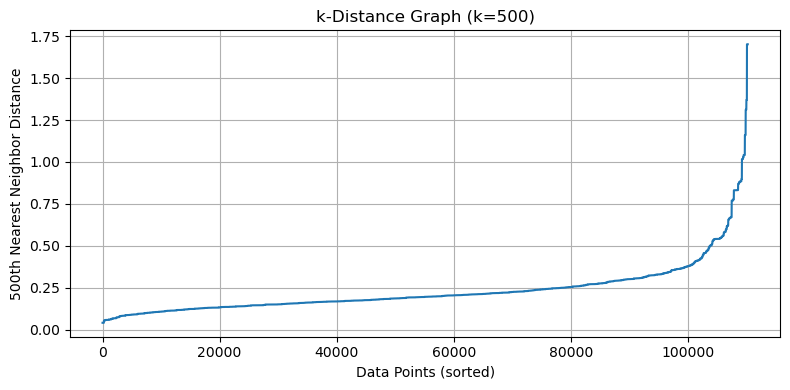

In [20]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# X = pca_df[['PC1', 'PC2', 'PC3']]  # or the scaled version
# X_scaled = StandardScaler().fit_transform(X)
X = pca_df[['PC1', 'PC2']]
# Use k = min_samples
k = 500
nn = NearestNeighbors(n_neighbors=k)
nn.fit(X)
distances, _ = nn.kneighbors(X)

# Take the k-th nearest distance for each point
k_distances = np.sort(distances[:, k-1])

# Plot the k-distance graph
plt.figure(figsize=(8, 4))
plt.plot(k_distances)
plt.title(f'k-Distance Graph (k={k})')
plt.xlabel('Data Points (sorted)')
plt.ylabel(f'{k}th Nearest Neighbor Distance')
plt.grid(True)
plt.tight_layout()
plt.show()

Estimated number of clusters: 5
Silhouette Score: -0.075


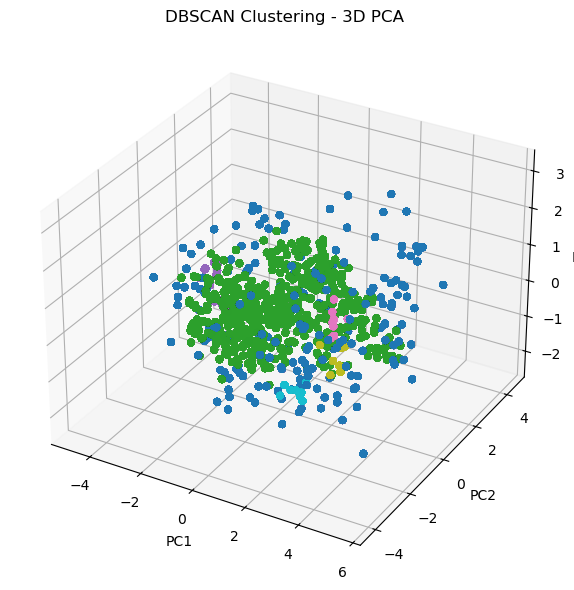

: 

: 

: 

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Standardize the PCA input again (if not already)
#X_scaled = StandardScaler().fit_transform(pca3d_df[['PC1', 'PC2', 'PC3']])

# Run DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=1000)
pca3d_df['DBSCAN_Cluster'] = dbscan.fit_predict(pca3d_df[['PC1', 'PC2', 'PC3']])

# Check how many clusters formed
n_clusters = len(set(pca3d_df['DBSCAN_Cluster'])) - (1 if -1 in pca3d_df['DBSCAN_Cluster'].values else 0)
print(f"Estimated number of clusters: {n_clusters}")

# Optional: Silhouette Score (only if more than 1 cluster)
if n_clusters > 1:
    score = silhouette_score(X_scaled, pca3d_df['DBSCAN_Cluster'])
    print(f"Silhouette Score: {score:.3f}")


# 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    pca3d_df['PC1'], pca3d_df['PC2'], pca3d_df['PC3'],
    c=pca3d_df['DBSCAN_Cluster'], cmap='tab10', s=20, alpha=0.8
)

ax.set_title('DBSCAN Clustering - 3D PCA')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.tight_layout()
plt.show()

Estimated number of clusters: 3
Silhouette Score: 0.084


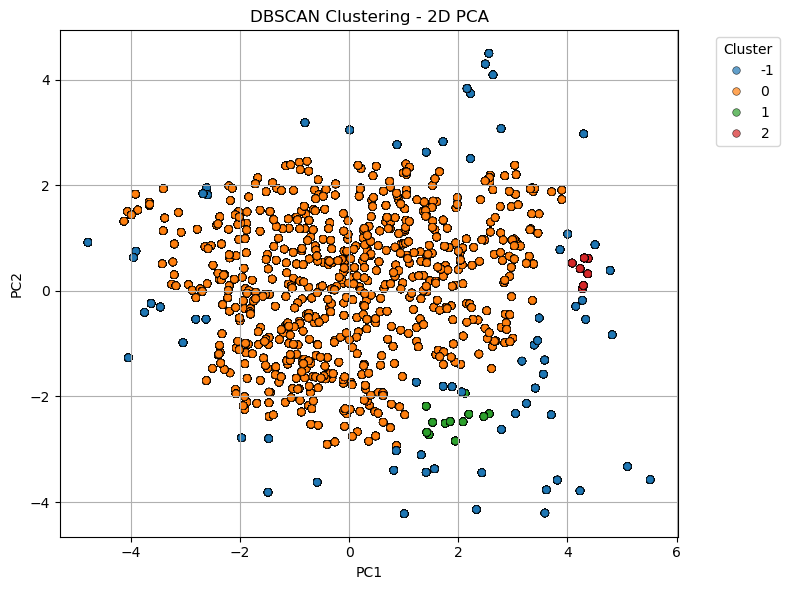

: 

: 

: 

In [ ]:
dbscan = DBSCAN(eps=0.4, min_samples=700)
pca_df['DBSCAN_Cluster'] = dbscan.fit_predict(pca_df[['PC1', 'PC2']])

# Check how many clusters formed
n_clusters = len(set(pca_df['DBSCAN_Cluster'])) - (1 if -1 in pca_df['DBSCAN_Cluster'].values else 0)
print(f"Estimated number of clusters: {n_clusters}")

# Optional: Silhouette Score (only if more than 1 cluster)
if n_clusters > 1:
    score = silhouette_score(X_scaled, pca_df['DBSCAN_Cluster'])
    print(f"Silhouette Score: {score:.3f}")



plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=pca_df, x='PC1', y='PC2',
    hue='DBSCAN_Cluster', palette='tab10', s=30, edgecolor='k', alpha=0.7
)
plt.title('DBSCAN Clustering - 2D PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\harry\AppData\Local\Temp\ipykernel_61508\499494335.py:59: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


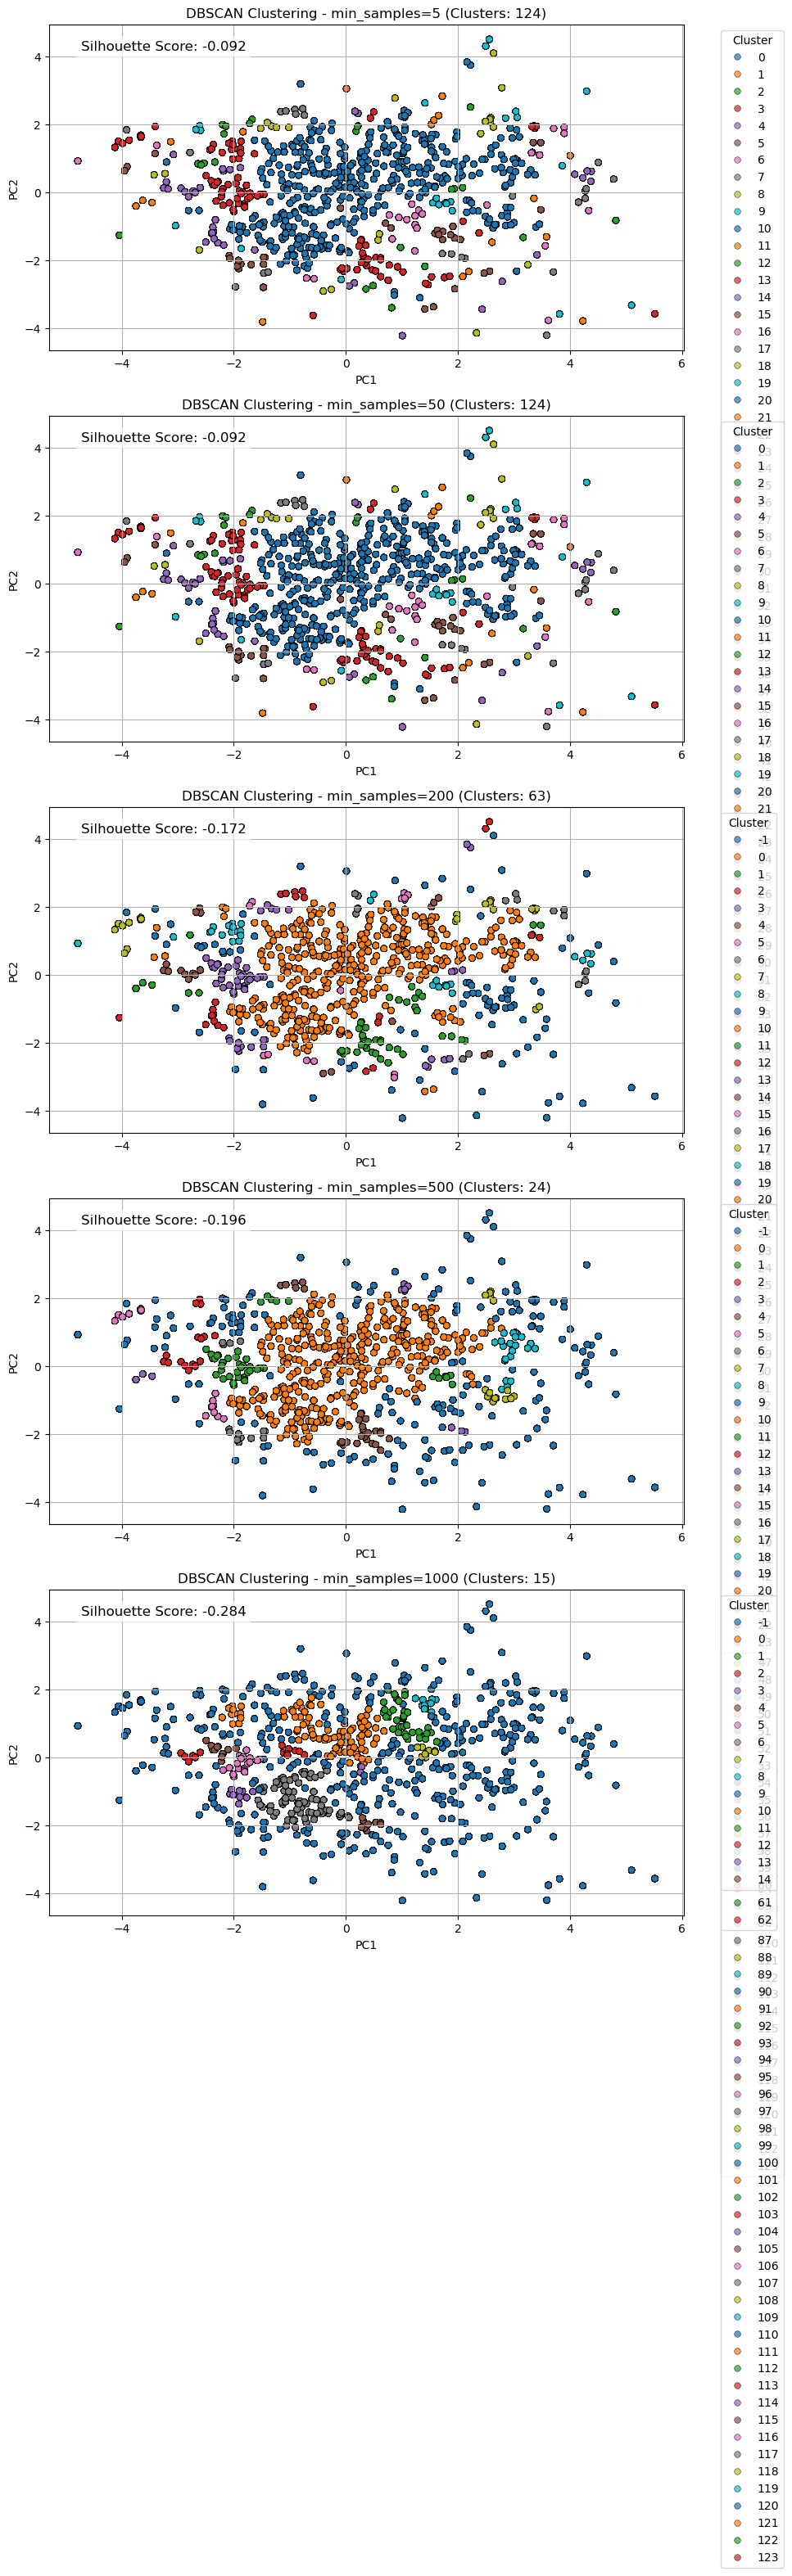

: 

: 

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Assuming pca_df contains the PCA-transformed data
X_scaled = pca_df[['PC1', 'PC2']]  # Use PCA components as features

# Function to compute the k-nearest neighbors distance (used for eps)
def calculate_eps(X, k=5):
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors.fit(X)
    distances, _ = neighbors.kneighbors(X)
    eps = np.mean(distances[:, -1])  # Use the mean of the k-th nearest distances as eps
    return eps

# Define a range for min_samples (min_points) and number of neighbors for calculating eps
min_samples_range = [5, 50, 200, 500, 1000]  # Adjust as needed
k_neighbors = 500  # You can adjust this value based on your data and analysis

# Calculate eps based on k-nearest neighbors
eps_value = calculate_eps(X_scaled, k=k_neighbors)

# Set up the plotting grid for subplots
fig, axes = plt.subplots(len(min_samples_range), 1, figsize=(10, 6 * len(min_samples_range)))
if len(min_samples_range) == 1:
    axes = [axes]  # Ensure axes is always iterable

# Iterate through different min_samples values
for i, min_samples in enumerate(min_samples_range):
    # Apply DBSCAN with calculated eps and current min_samples
    dbscan = DBSCAN(eps=eps_value, min_samples=min_samples)
    pca_df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)
    
    # Get the number of clusters (ignoring noise label -1)
    n_clusters = len(set(pca_df['DBSCAN_Cluster'])) - (1 if -1 in pca_df['DBSCAN_Cluster'].values else 0)
    
    # Plot the DBSCAN result for the current min_samples
    sns.scatterplot(
        data=pca_df, x='PC1', y='PC2',
        hue='DBSCAN_Cluster', palette='tab10', s=30, edgecolor='k', alpha=0.7,
        ax=axes[i]
    )
    axes[i].set_title(f'DBSCAN Clustering - min_samples={min_samples} (Clusters: {n_clusters})')
    axes[i].set_xlabel('PC1')
    axes[i].set_ylabel('PC2')
    axes[i].grid(True)
    axes[i].legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Optional: Silhouette Score (only if more than 1 cluster)
    if n_clusters > 1:
        score = silhouette_score(X_scaled, pca_df['DBSCAN_Cluster'])
        axes[i].text(0.05, 0.95, f'Silhouette Score: {score:.3f}', transform=axes[i].transAxes,
                     fontsize=12, verticalalignment='top', horizontalalignment='left',
                     bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

plt.tight_layout()
plt.show()
